In [1]:
import pickle

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import datetime

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None) 

In [2]:
with open('../Data/Crisis_data_cleaned.txt', 'rb') as f:
    results = pickle.load(f)

In [3]:
df = pd.DataFrame.from_records(results)

#### Cleaning few params based on analysis and applying label encoding to categorical values.

In [4]:
df['officer_years_of_experience_mean'] = df.groupby(['officer_id'])['officer_years_of_experience'].transform('mean')

In [5]:
df = df[(df['occured_date_time'] >= '2015-05-15 00:00:00')]

In [6]:
df['reported_minus_occurred'] = df.reported_date_time - df.occured_date_time

In [7]:
df['reported_minus_occurred_in_seconds'] = df['reported_minus_occurred'].dt.total_seconds()

In [8]:
df.drop(['officer_years_of_experience','occured_date_time','reported_minus_occurred'], inplace=True, axis=1)

In [9]:
df.set_index('reported_date_time', inplace=True)

In [10]:
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

In [11]:
def labelize(key, value):
    return dict(zip(key, value))

In [12]:
le = LabelEncoder()
df['beat'] = le.fit_transform(df['beat'])
beat_label = labelize(le.classes_, le.transform(le.classes_))
df['call_type'] = le.fit_transform(df['call_type'])
call_type_label = labelize(le.classes_, le.transform(le.classes_))
df['cit_certified_indicator'] = le.fit_transform(df['cit_certified_indicator'])
cit_certified_indicator_label = labelize(le.classes_, le.transform(le.classes_))
df['cit_officer_arrived'] = le.fit_transform(df['cit_officer_arrived'])
cit_officer_arrived_label = labelize(le.classes_, le.transform(le.classes_))
df['cit_officer_dispatched'] = le.fit_transform(df['cit_officer_dispatched'])
cit_officer_dispatched_label = labelize(le.classes_, le.transform(le.classes_))
df['cit_officer_requested'] = le.fit_transform(df['cit_officer_requested'])
cit_officer_requested_label = labelize(le.classes_, le.transform(le.classes_))
df['disposition'] = le.fit_transform(df['disposition'])
disposition_label = labelize(le.classes_, le.transform(le.classes_))
df['final_call_type'] = le.fit_transform(df['final_call_type'])
final_call_type_label = labelize(le.classes_, le.transform(le.classes_))
df['initial_call_type'] = le.fit_transform(df['initial_call_type'])
initial_call_type_label = labelize(le.classes_, le.transform(le.classes_))
df['officer_bureau_desc'] = le.fit_transform(df['officer_bureau_desc'])
officer_bureau_desc_label = labelize(le.classes_, le.transform(le.classes_))
df['officer_gender'] = le.fit_transform(df['officer_gender'])
officer_gender_label = labelize(le.classes_, le.transform(le.classes_))
df['officer_precinct_desc'] = le.fit_transform(df['officer_precinct_desc'])
officer_precinct_desc_label = labelize(le.classes_, le.transform(le.classes_))
df['officer_race'] = le.fit_transform(df['officer_race'])
officer_race_label = labelize(le.classes_, le.transform(le.classes_))
df['officer_squad_desc'] = le.fit_transform(df['officer_squad_desc'])
officer_squad_desc_label = labelize(le.classes_, le.transform(le.classes_))
df['precinct'] = le.fit_transform(df['precinct'])
precinct_label = labelize(le.classes_, le.transform(le.classes_))
df['sector'] = le.fit_transform(df['sector'])
sector_label = labelize(le.classes_, le.transform(le.classes_))
df['subject_veteran_indicator'] = le.fit_transform(df['subject_veteran_indicator'])
subject_veteran_indicator_label = labelize(le.classes_, le.transform(le.classes_))
df['use_of_force_indicator'] = le.fit_transform(df['use_of_force_indicator'])
use_of_force_indicator_label = labelize(le.classes_, le.transform(le.classes_))

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 39654 entries, 2016-09-09 22:34:00 to 2016-12-30 12:58:00
Data columns (total 23 columns):
beat                                  39654 non-null int64
call_type                             39654 non-null int64
cit_certified_indicator               39654 non-null int64
cit_officer_arrived                   39654 non-null int64
cit_officer_dispatched                39654 non-null int64
cit_officer_requested                 39654 non-null int64
disposition                           39654 non-null int64
final_call_type                       39654 non-null int64
initial_call_type                     39654 non-null int64
officer_bureau_desc                   39654 non-null int64
officer_gender                        39654 non-null int64
officer_id                            39654 non-null int64
officer_precinct_desc                 39654 non-null int64
officer_race                          39654 non-null int64
officer_squad_desc            

## Preparing for Machine learning.

#### Before let's look into the time diff between reported and occurred time and use different plot to understand patterns.

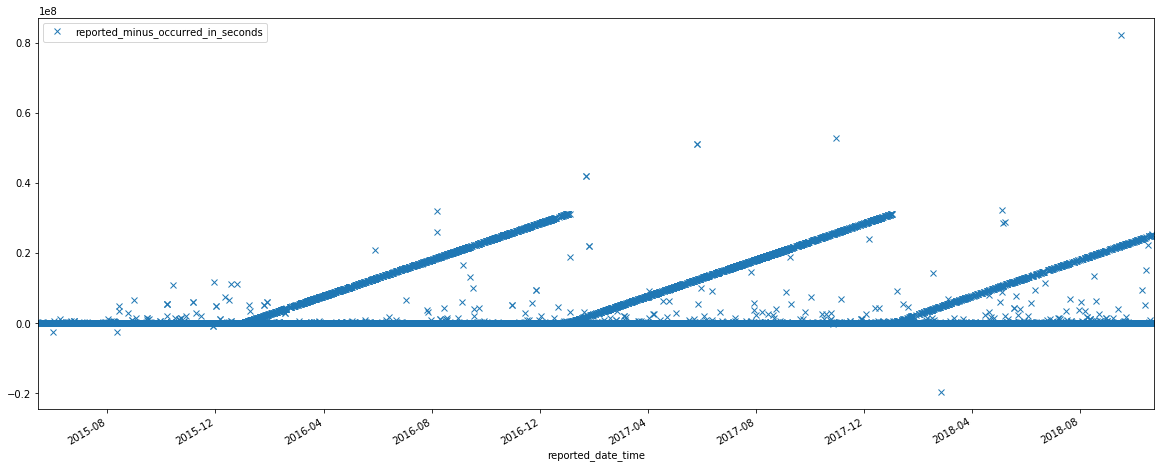

In [14]:
df.reported_minus_occurred_in_seconds.plot(figsize=(20,8), style='x')
plt.legend()
plt.show()

#### End of the year the time difference increases gradually from the start of the year and after new year time difference decreases sharply.

In [26]:
df.tail()

,beat,call_type,cit_certified_indicator,cit_officer_arrived,cit_officer_dispatched,cit_officer_requested,disposition,final_call_type,initial_call_type,officer_bureau_desc,officer_gender,officer_id,officer_precinct_desc,officer_race,officer_squad_desc,officer_year_of_birth,precinct,sector,subject_veteran_indicator,template_id,use_of_force_indicator,officer_years_of_experience_mean,reported_minus_occurred_in_seconds
reported_date_time,,,,,,,,,,,,,,,,,,,,,,,
2016-09-02 09:53:00,10,0,1,1,0,0,3,89,64,4,1,1890,3,7,12,1984,0,3,2,189359,0,0.766667,10176.0
2017-07-18 03:44:00,36,6,0,0,0,0,8,35,96,4,0,2238,18,7,133,1982,4,12,1,287056,0,0.781250,6935.0
2017-07-19 17:13:00,22,0,0,0,0,0,4,35,151,4,1,2191,18,7,121,1991,4,7,1,287098,0,1.317073,6579.0
2017-05-13 15:33:00,22,0,1,1,1,0,14,35,64,4,1,2242,18,2,114,1984,4,7,1,265211,0,0.666667,104546.0
2016-12-30 12:58:00,49,6,0,0,0,0,7,35,123,4,1,1751,13,4,95,1982,3,16,1,225077,0,3.396040,5505.0


In [16]:
import statsmodels.api as sm

In [17]:
train = df[:int(0.8*(len(df)))]
test = df[int(0.8*(len(df))):]

In [18]:
train_X = train.index
#train_X

In [19]:
pred_X = train['reported_minus_occurred_in_seconds']
train.drop([ 'reported_minus_occurred_in_seconds'], axis=1, inplace=True)

pred_y = test['reported_minus_occurred_in_seconds']
test.drop([ 'reported_minus_occurred_in_seconds'], axis=1, inplace=True)

In [20]:
train.head()

,beat,call_type,cit_certified_indicator,cit_officer_arrived,cit_officer_dispatched,cit_officer_requested,disposition,final_call_type,initial_call_type,officer_bureau_desc,officer_gender,officer_id,officer_precinct_desc,officer_race,officer_squad_desc,officer_year_of_birth,precinct,sector,subject_veteran_indicator,template_id,use_of_force_indicator,officer_years_of_experience_mean
reported_date_time,,,,,,,,,,,,,,,,,,,,,,
2016-09-09 22:34:00,47,6,0,0,0,0,10,99,153,4,1,1576,12,5,83,1982,1,15,2,193069,0,9.180723
2017-12-12 21:51:00,27,4,1,1,1,0,4,35,123,4,0,1785,18,7,132,1989,4,9,1,356577,0,2.073171
2017-12-12 23:14:00,22,0,1,1,1,0,4,35,150,4,1,1768,18,6,131,1982,4,7,1,356580,0,2.694118
2017-12-13 18:28:00,3,6,0,1,0,0,12,48,150,4,1,1088,3,7,17,1972,0,1,0,356757,0,15.775510
2017-12-13 13:42:00,6,4,0,1,0,0,12,74,85,4,1,1682,18,7,117,1985,4,2,0,356716,0,7.146667


In [36]:
# VAR example
from statsmodels.tsa.vector_ar.var_model import VAR
# contrived dataset with dependency
# fit model
model = VAR(train)
model_fit = model.fit()
# make prediction
yhat = model_fit.forecast(model_fit.y, steps=10)
#print(yhat)

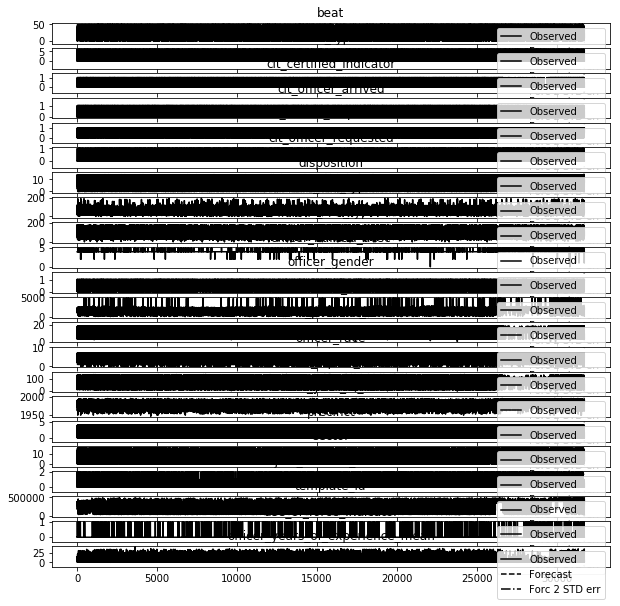

In [33]:
model_fit.plot_forecast(10)

In [25]:
#model_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 02, Jan, 2019
Time:                     21:08:39
--------------------------------------------------------------------
No. of Equations:         22.0000    BIC:                    54.1707
Nobs:                     31722.0    HQIC:                   54.0800
Log likelihood:      -1.84683e+06    FPE:                2.93828e+23
AIC:                      54.0373    Det(Omega_mle):     2.89180e+23
--------------------------------------------------------------------
Results for equation beat
                                         coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------------------------
const                                     -37.738832        28.867703           -1.307           0.191
L1.beat                                     0.092221         0.097592       

In [27]:
from pandas import datetime
start_index = datetime(2017, 12, 25)
end_index = datetime(2018, 12, 26)
forecast = model_fit.predict(start=start_index, end=end_index)

AttributeError: 'VARResults' object has no attribute 'predict'